In [ ]:
%pip install mlxtend --upgrade
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('compas-scores-two-years.csv')

In [ ]:
data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [ ]:
len(data)

7214

In [ ]:
len(data.drop_duplicates())

7214

In [ ]:
data.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [ ]:
# only one distinct value, drop
data.v_type_of_assessment.unique()


array(['Risk of Violence'], dtype=object)

In [ ]:
# choose one or another
data.score_text.unique()
data.v_score_text.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
# could group but perform worse if grouped
data.juv_fel_count.unique()

array([ 0,  2,  1,  8,  4,  3,  9, 20,  6,  5, 10])

In [ ]:
# transform 
data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])

In [ ]:
# duplicate columns
data=data.drop(columns=['priors_count.1'])

In [ ]:
# days between screening and arrest need to be between -30 and 30 for best accuracy of COMPAS Scores
data=data.loc[(data['days_b_screening_arrest']<=30) & (data['days_b_screening_arrest']>=-30)]

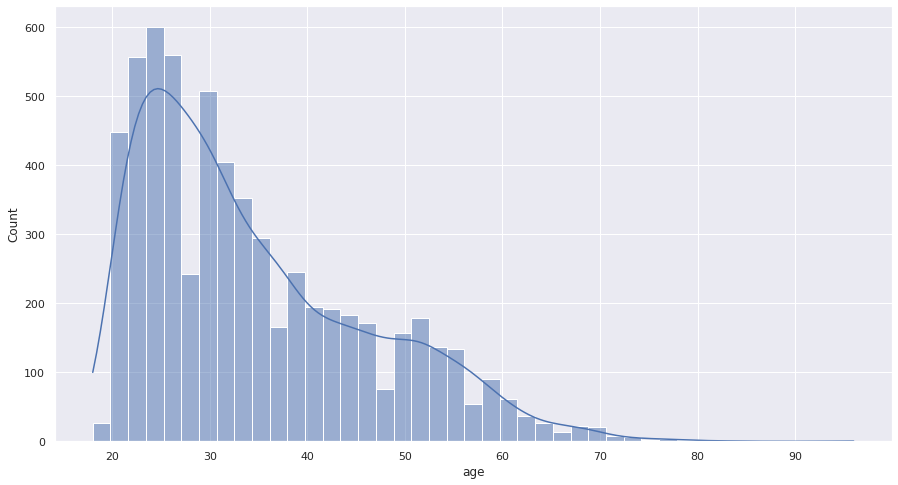

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data.age,kde=True)

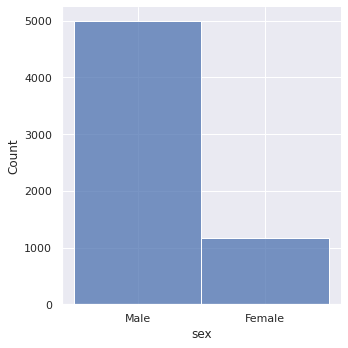

In [ ]:
sns.displot(data.sex)

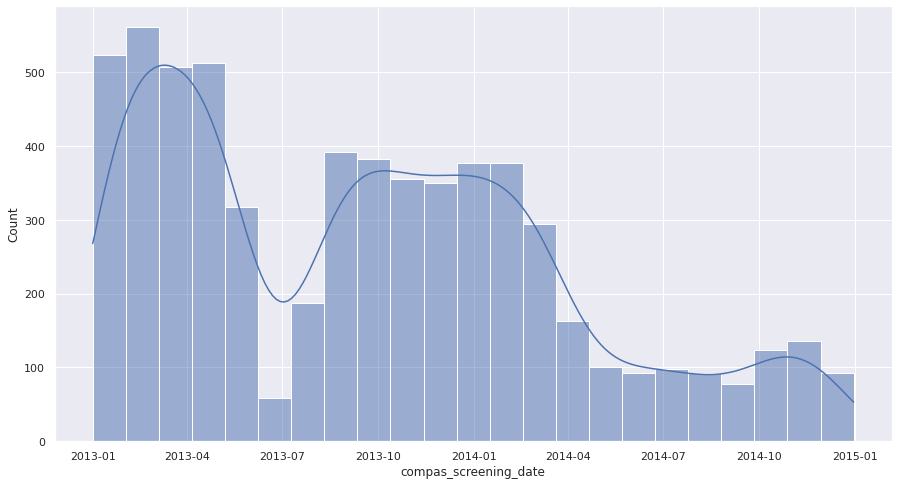

In [ ]:
sns.histplot(data.compas_screening_date, kde=True)
# For some reason the compas screening for 2013-07 and after 2014-04 are fewer, we will discover the reason in the future.

[Text(0, 0, 'Other'),
 Text(0, 0, 'African-American'),
 Text(0, 0, 'Caucasian'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Native American')]

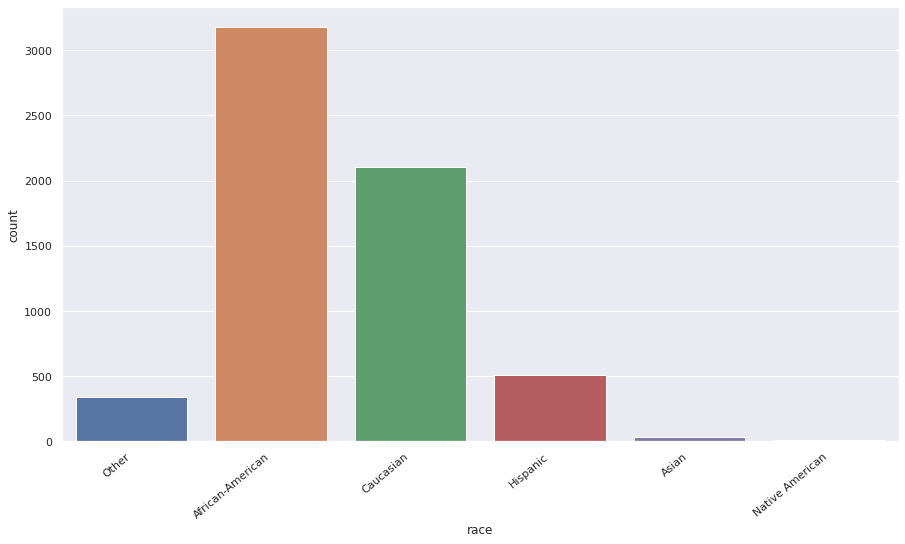

In [ ]:
ax = sns.countplot(x="race", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

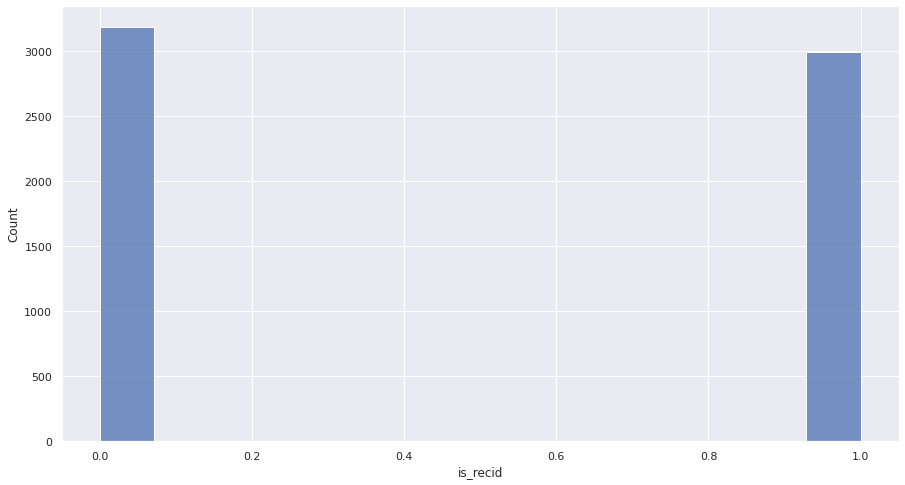

In [ ]:
sns.histplot(data.is_recid)

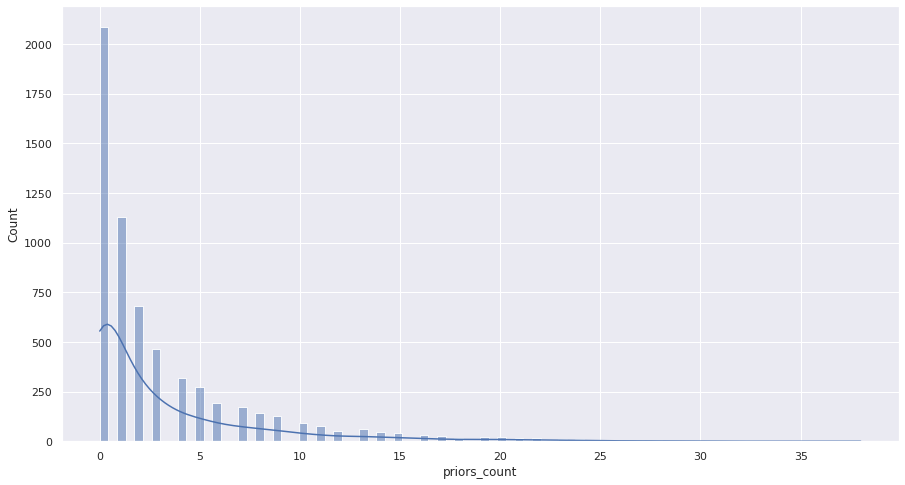

In [ ]:
sns.histplot(data.priors_count, kde=True)

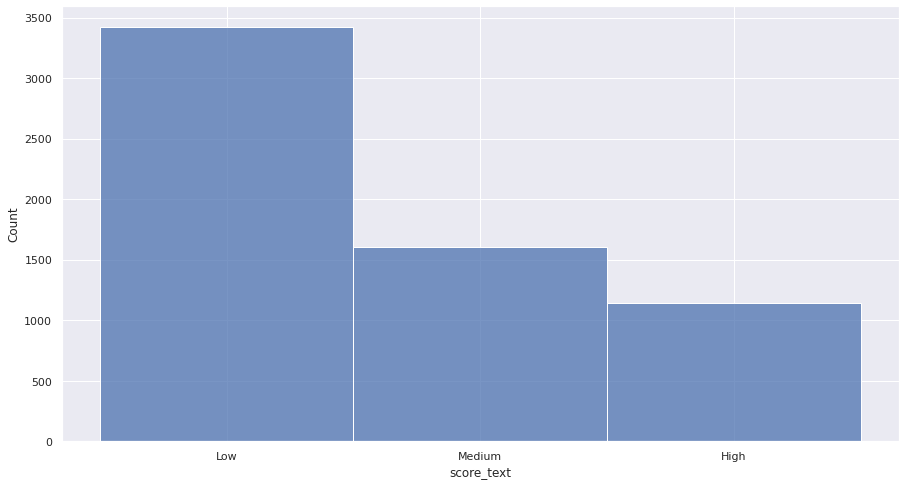

In [ ]:
sns.histplot(data.score_text)

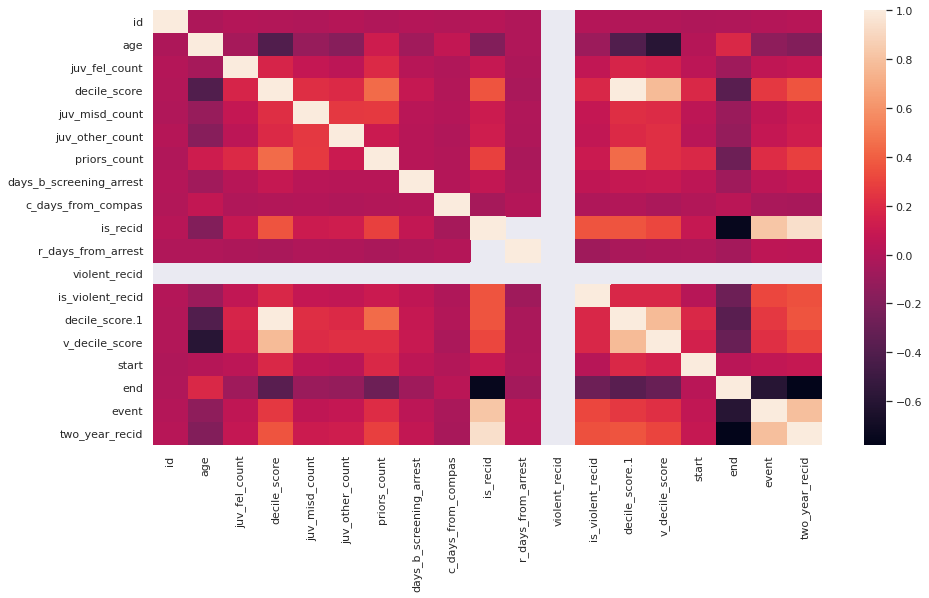

In [ ]:
sns.heatmap(data.corr());

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
lreg = LogisticRegression()

In [ ]:
sfs1 = sfs(lreg, k_features=15, forward=False, verbose=0, scoring='accuracy')
sfs1 = sfs1.fit(data.loc[:, data.columns != 'two_year_recid'], data['two_year_recid'])

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'start', 'end', 'event']


In [ ]:

features = ['sex','age_cat','race','decile_score','priors_count','c_charge_degree','is_violent_recid','score_text']
features2=['c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 
                    'days_b_screening_arrest', 'decile_score','priors_count']
labels = ['two_year_recid']
df = data [features + labels]
df2= data[features2 + labels]


In [ ]:
df = pd.get_dummies(df)   # hone-hot encoding
df2 = pd.get_dummies(df2)

In [ ]:
Y=df['two_year_recid']
X=df.loc[:, df.columns != 'two_year_recid']

In [ ]:
X.decile_score.value_counts()

1     1286
2      822
4      666
3      647
5      582
6      529
7      496
9      420
8      420
10     304
Name: decile_score, dtype: int64

In [ ]:
#Train and test split
import random
random.seed(101)
df = df.sample(frac = 1, random_state = 42)

X_train, X_val, X_test = np.split(X,[int(.5*len(df)),int(.75*len(df))])
Y_train, Y_val, Y_test = np.split(Y,[int(.5*len(df)),int(.75*len(df))])

In [ ]:
X_train

,decile_score,priors_count,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M,score_text_High,score_text_Low,score_text_Medium
0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,3,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,4,4,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
5,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0
6,6,14,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3611,4,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0
3612,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3613,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
rdc=RandomForestClassifier(n_estimators=100, random_state = 666)


In [ ]:
rdc.fit(X_train,Y_train)


RandomForestClassifier(random_state=666)

In [ ]:
pred = rdc.predict(X_test)
conf_mat = confusion_matrix(Y_test, pred)
np.sum(pred != Y_test.to_numpy().flatten()) / len(Y_test)

0.3149708360337006

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
precision = precision_score(Y_test, pred, average='binary')
recall = recall_score(Y_test, pred, average='binary')
accuracy = accuracy_score(Y_test, pred)
print(precision)
print(recall)
print(accuracy)

0.6713615023474179
0.6085106382978723
0.6850291639662994


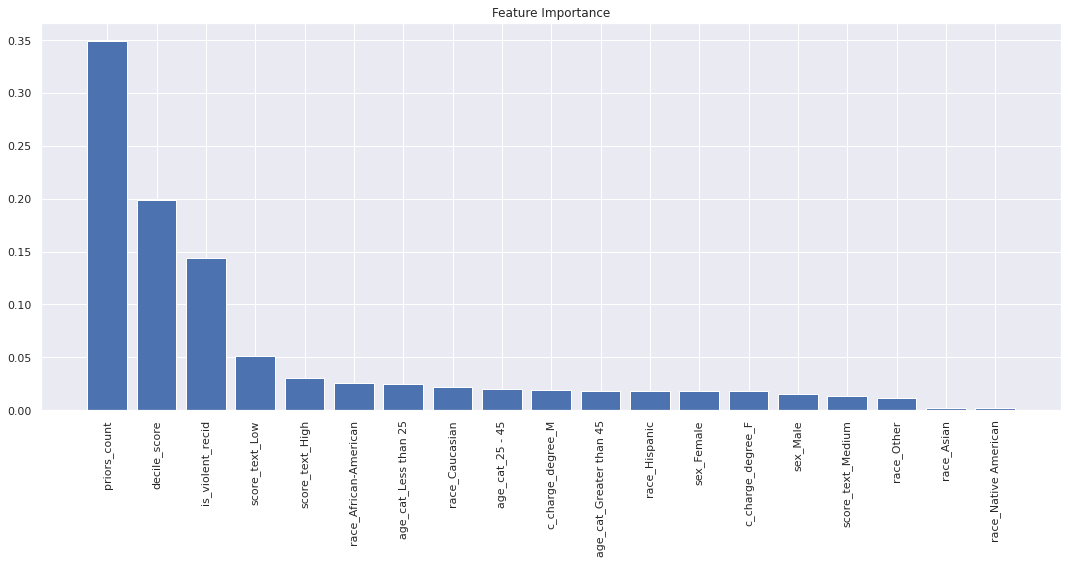

In [ ]:
importance = rdc.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Random forest with grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_val, Y_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 100,
 bootstrap= True)
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1000)

In [ ]:
X_test

,decile_score,priors_count,is_violent_recid,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M,score_text_High,score_text_Low,score_text_Medium
5399,6,3,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5400,3,2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
5401,1,6,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
5402,6,6,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
5403,9,5,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,7,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
7210,3,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
7211,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
7212,2,3,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
pred_rfc = rfc.predict(X_test)
np.sum(pred_rfc != Y_test.to_numpy().flatten()) / len(Y_test)

0.27025275437459495

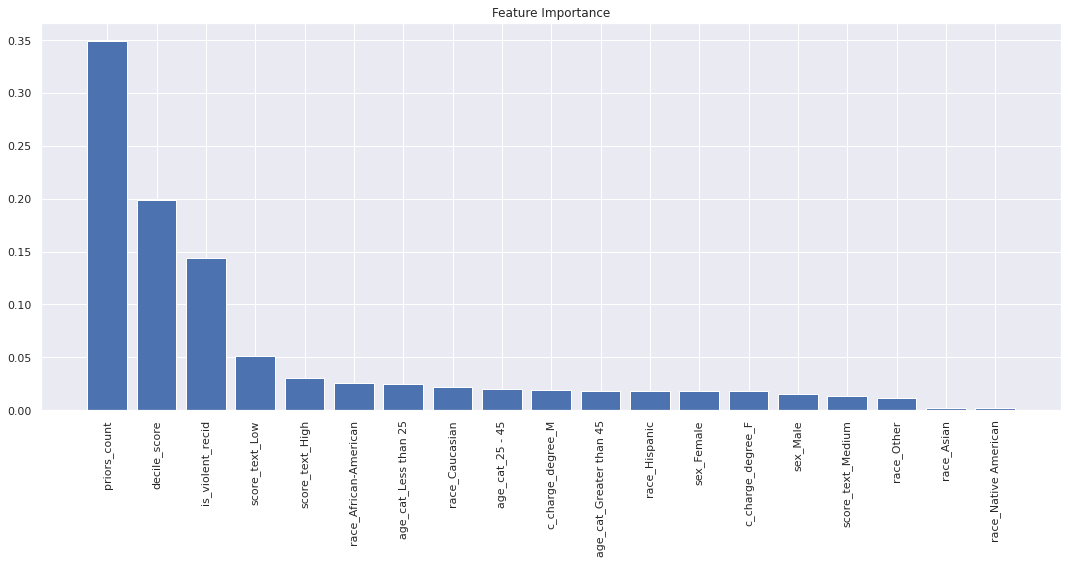

In [ ]:
importance = rdc.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
X_test['race_African-American'].value_counts()

1    802
0    741
Name: race_African-American, dtype: int64

In [ ]:
X_test1 = X_test.copy()
X_test1['pred']=pred_rfc

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_African-American']==1])

398

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Asian']==1])

2

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Caucasian']==1])

141

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Hispanic']==1])

37

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Native American']==1])

3

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Other']==1])

15

In [ ]:
len(X_test1[(X_test1['pred']==1) & X_test1['race_Hispanic']==1])

37

In [ ]:
X_test1.pred.value_counts()

0    947
1    596
Name: pred, dtype: int64

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#random forest
precision = precision_score(Y_test, pred_rfc, average='binary')
recall = recall_score(Y_test, pred_rfc, average='binary')
accuracy = accuracy_score(Y_test, pred_rfc)
f1 = f1_score(Y_test, pred_rfc, average='binary')
print(precision)
print(recall)
print(f1)
print(accuracy)

0.7416107382550335
0.6269503546099291
0.679477325134512
0.729747245625405


In [ ]:
from joblib import Parallel, delayed
import joblib

In [ ]:
joblib.dump(rfc, 'RFC_Prison.pkl')

['RFC_Prison.pkl']

In [ ]:
df = pd.DataFrame({'decile':[decile],'priors_count':[priors],'is_violent_recid':[isviolent],'sex_Female':[sex_Female],'sex_Male':[sex_Male],'age_cat_25 - 45':[age_cat_25_45],'age_cat_Greater than 45':[age_cat_Greater],'age_cat_Less than 25':[age_cat_Less],'race_African-American':[race_AfricanAmerican],'race_Asian':[race_Asian],'race_Caucasian':[race_Caucasian],'race_Hispanic':[race_Hispanic],'race_Native':[race_NativeAmerican],'race_Other':[race_Other],'c_charge_degree_F':[charge_F],'c_charge_degree_M':[charge_M],'score_text_High':[score_H],'score_text_Low':[score_L],'score_text_Medium':[score_M]})


NameError: ignored